In [1]:
from dataset import MnistScenesGenerator, MnistScene
from new_model import SceneVAE, train_model

import torchvision
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
import matplotlib.pyplot as plt
import os

In [2]:
model = SceneVAE().to('cuda')
train_data = MnistScene(path='mnist_scenes_train')
train_dataloader = DataLoader(train_data, batch_size=42)

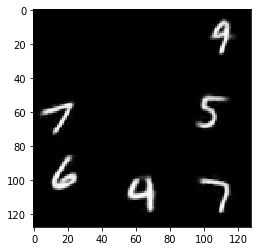

In [317]:
r = nn.ReLU()
for batch in train_dataloader:
    model.eval()
    with torch.no_grad():
        scene = batch['scene'].to('cuda')
        masks = batch['masks'].to('cuda')
        labels = batch['labels'].to('cuda')
        z1, _, _, zs1 = model.latent_operations(model.encoder(masks), labels)
        recon_scene = model.decoder(z1)
        recon_scene = r(recon_scene)
        plt.imshow(recon_scene[0][0].detach().cpu().numpy(), cmap='gray') 
    break

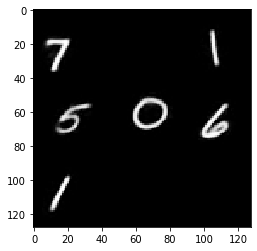

In [318]:
r = nn.ReLU()
for batch in train_dataloader:
    model.eval()
    with torch.no_grad():
        scene = batch['scene'].to('cuda')
        masks = batch['masks'].to('cuda')
        labels = batch['labels'].to('cuda')
        z2, _, _, zs2 = model.latent_operations(model.encoder(masks), labels)
        recon_scene = model.decoder(z2)
        recon_scene = r(recon_scene)
        plt.imshow(recon_scene[0][0].detach().cpu().numpy(), cmap='gray') 
    break

Assume we have two sets of vectors (zs1, zs2) that combines through sum into vectors of whole scenes

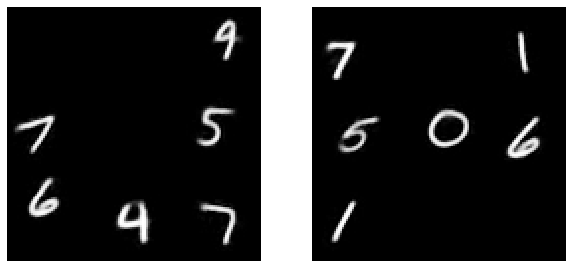

In [333]:
recon_scenes = []
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z2 = torch.sum(zs2, axis=0)
rec_scene_2 = r(model.decoder(model._lin(z2)))

fig, axs = plt.subplots(1, 2, figsize=(10, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()

Let's try to subtract the vector of the four from the scene vector (at 8'th position)

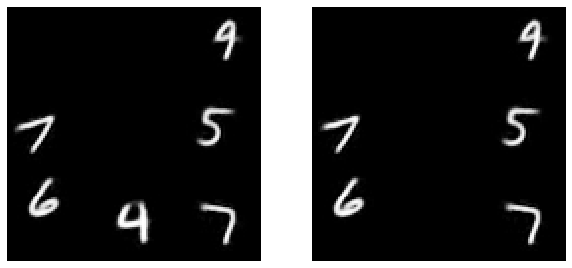

In [332]:
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z1 = torch.sum(zs1, axis=0) - zs1[7]
rec_scene_2 = r(model.decoder(model._lin(z1)))

fig, axs = plt.subplots(1, 2, figsize=(10, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()

Now let's try to do the same thing, but with addition. As a result, the four became more bold.

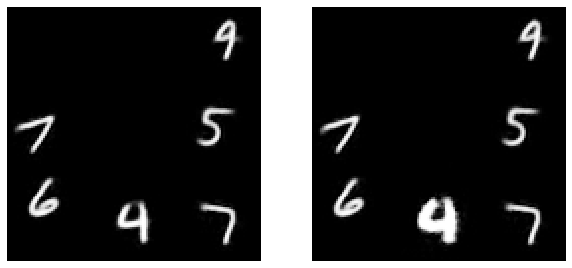

In [331]:
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z1 = torch.sum(zs1, axis=0) + zs1[7]
rec_scene_2 = r(model.decoder(model._lin(z1)))

fig, axs = plt.subplots(1, 2, figsize=(10, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()

But addition does not always work like this, for example, if we do this with a five, it will turn into a bold three

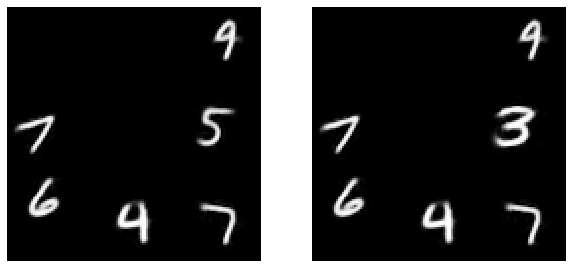

In [330]:
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z1 = torch.sum(zs1, axis=0) + zs1[5]
rec_scene_2 = r(model.decoder(model._lin(z1)))

fig, axs = plt.subplots(1, 2, figsize=(10, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()

We can move numbers from one scene to another

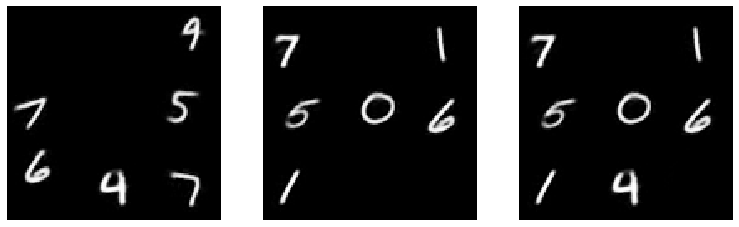

In [329]:
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z2 = torch.sum(zs2, axis=0)
rec_scene_2 = r(model.decoder(model._lin(z2)))

z3 = torch.sum(zs2, axis=0) + zs1[7]
rec_scene_3 = r(model.decoder(model._lin(z3)))

fig, axs = plt.subplots(1, 3, figsize=(13, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()
axs[2].imshow(rec_scene_3[0][0].detach().cpu().numpy(), cmap='gray')
axs[2].set_axis_off()

Let's try to add a five from the first to the second scene (on the second scene there is a six in this place). The result is a bold five, similar to the one from the first scene.

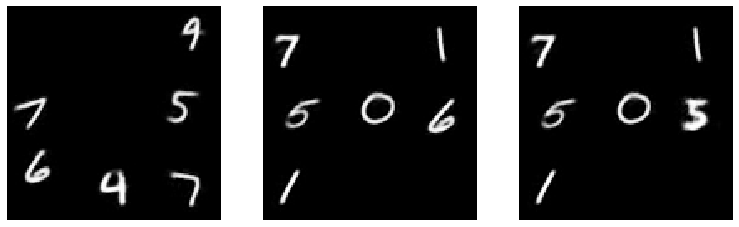

In [336]:
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z2 = torch.sum(zs2, axis=0)
rec_scene_2 = r(model.decoder(model._lin(z2)))

z3 = torch.sum(zs2, axis=0) + zs1[5]
rec_scene_3 = r(model.decoder(model._lin(z3)))

fig, axs = plt.subplots(1, 3, figsize=(13, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()
axs[2].imshow(rec_scene_3[0][0].detach().cpu().numpy(), cmap='gray')
axs[2].set_axis_off()

But if we add seven from the first to the second scene, we get a two.

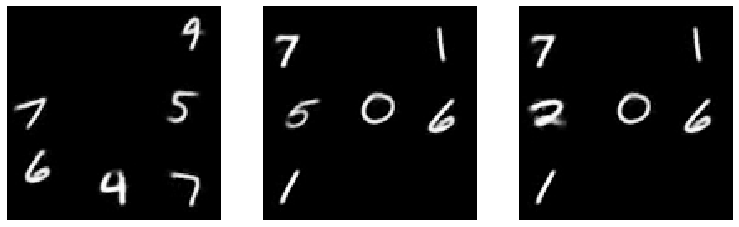

In [338]:
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z2 = torch.sum(zs2, axis=0)
rec_scene_2 = r(model.decoder(model._lin(z2)))

z3 = torch.sum(zs2, axis=0) + zs1[3]
rec_scene_3 = r(model.decoder(model._lin(z3)))

fig, axs = plt.subplots(1, 3, figsize=(13, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()
axs[2].imshow(rec_scene_3[0][0].detach().cpu().numpy(), cmap='gray')
axs[2].set_axis_off()

And if we add the entire scene vectors?

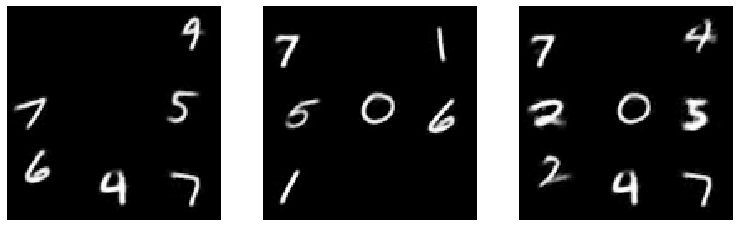

In [346]:
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z2 = torch.sum(zs2, axis=0)
rec_scene_2 = r(model.decoder(model._lin(z2)))

z3 = z1 + z2
rec_scene_3 = r(model.decoder(model._lin(z3)))

fig, axs = plt.subplots(1, 3, figsize=(13, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()
axs[2].imshow(rec_scene_3[0][0].detach().cpu().numpy(), cmap='gray')
axs[2].set_axis_off()

Subtract the second from the first scene vector

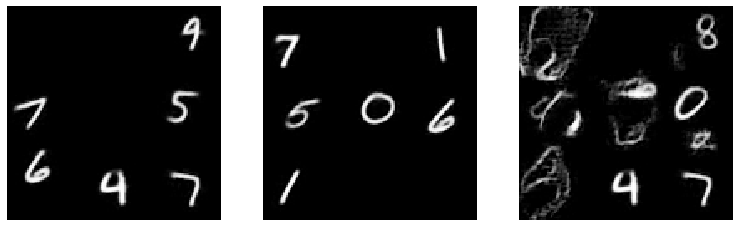

In [349]:
z1 = torch.sum(zs1, axis=0)
rec_scene_1 = r(model.decoder(model._lin(z1)))

z2 = torch.sum(zs2, axis=0)
rec_scene_2 = r(model.decoder(model._lin(z2)))

z3 = z1 - z2
rec_scene_3 = r(model.decoder(model._lin(z3)))

fig, axs = plt.subplots(1, 3, figsize=(13, 9))
axs[0].imshow(rec_scene_1[0][0].detach().cpu().numpy(), cmap='gray')
axs[0].set_axis_off()
axs[1].imshow(rec_scene_2[0][0].detach().cpu().numpy(), cmap='gray')
axs[1].set_axis_off()
axs[2].imshow(rec_scene_3[0][0].detach().cpu().numpy(), cmap='gray')
axs[2].set_axis_off()